<a href="https://colab.research.google.com/github/estellacoding/gpt-function-calling-langchain-agent-search/blob/main/gpt_function_calling_langchain_agent_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPT

## 1.GPT + Search

[申請 OpenAI API Key](https://platform.openai.com/settings/organization/api-keys)

In [ ]:
!pip install googlesearch-python

### 1-1 GPT use Search Tool

In [2]:
import googlesearch
from google.colab import userdata
from openai import OpenAI
from tabulate import tabulate

# 取得OpenAI API金鑰
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
# 初始化OpenAI客戶端
client = OpenAI(api_key=OPENAI_API_KEY)

# 定義查詢問題
query = "請問2024年金鐘獎的戲劇節目的女主角獎是誰？"

# 初始查詢GPT
completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "當你不確定使用者的問題時，請回答『不知道』。"},
        {"role": "user", "content": query}
    ]
)

response_content = completion.choices[0].message.content

print("===== 初始回應 =====")
print(response_content)

# 如果GPT回應「不知道」則進行Google搜尋
if "不知道" in response_content:
    print("===== 啟動Google搜尋 =====")

    try:
        # 使用googlesearch搜尋
        search_results = list(googlesearch.search(query, advanced=True, num_results=5))

        # 確認搜尋結果是否非空
        if not search_results:
            print("未找到相關搜尋結果。")
        else:
            # 搜尋結果過濾與結構化
            table_data = []
            content = "以下為從搜尋結果中整理的事實：\n"
            for item in search_results:
                table_data.append([item.title, item.description])
                content += f"標題: {item.title}\n內容: {item.description}\n\n"

            # 格式化輸出搜尋結果
            print(tabulate(table_data, headers=["標題", "內容"], tablefmt="grid"))
            content += "請依照上述事實回答以下問題。\n"

            # 加上搜尋結果再次詢問GPT
            follow_up_completion = client.chat.completions.create(
                model="gpt-4o-mini",
                messages=[
                    {"role": "system", "content": content},
                    {"role": "user", "content": query}
                ]
            )

            follow_up_content = follow_up_completion.choices[0].message.content

            print("===== 最終回應 =====")
            print(follow_up_content)
    except Exception as e:
        print(f"搜尋過程中出現錯誤：{e}")
else:
    print("初始回應已解答問題，無需搜尋。")

===== 初始回應 =====
不知道。
===== 啟動Google搜尋 =====
+------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| 標題                                                             | 內容                                                                                                                                                                               |
+==================================================================+====================================================================================================================================================================================+
| 【2024金鐘獎】金鐘59完整得獎名單                                 | Oct 20, 2024  ·  2024金鐘獎「戲劇節目女主角獎」得獎名單. 金鐘獎,金鐘獎2024,金鐘59,2024金鐘 kao hsing. 得獎者：楊貴媚，《有生之年》. 方宥心，《大愛劇場—早點回家》 ...              |
+--------------------------

In [3]:
import googlesearch
from google.colab import userdata
from openai import OpenAI
from tabulate import tabulate

# 取得OpenAI API金鑰
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
# 初始化OpenAI客戶端
client = OpenAI(api_key=OPENAI_API_KEY)

# 定義查詢問題
query = "請問2024年金鐘獎的戲劇節目的男主角獎是誰？"

# 初始查詢GPT
completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "當你不確定使用者的問題時，請回答『不知道』。"},
        {"role": "user", "content": query}
    ]
)
response_content = completion.choices[0].message.content

# 初始回應所消耗Token
initial_tokens = completion.usage.total_tokens

print("===== 初始回應 =====")
print(response_content)
print(f"輸入Token數：{completion.usage.prompt_tokens}")
print(f"輸出Token數：{completion.usage.completion_tokens}")
print(f"初始回應消耗Token數：{initial_tokens}")

# 如果GPT回應「不知道」則進行Google搜尋
if "不知道" in response_content:
    print("===== 啟動 Google 搜尋 =====")

    try:
        # 使用googlesearch搜尋
        search_results = list(googlesearch.search(query, advanced=True, num_results=5))

        # 確認搜尋結果是否非空
        if not search_results:
            print("未找到相關搜尋結果。")
        else:
            # 搜尋結果過濾與結構化
            table_data = []
            content = "以下為從搜尋結果中整理的事實：\n"
            for item in search_results:
                table_data.append([item.title, item.description])
                content += f"標題: {item.title}\n內容: {item.description}\n\n"

            # 格式化輸出搜尋結果
            print(tabulate(table_data, headers=["標題", "內容"], tablefmt="grid"))
            content += "請依照上述事實回答以下問題。\n"

            # 加上搜尋結果再次詢問GPT
            follow_up_completion = client.chat.completions.create(
                model="gpt-4o-mini",
                messages=[
                    {"role": "system", "content": content},
                    {"role": "user", "content": query}
                ]
            )

            follow_up_content = follow_up_completion.choices[0].message.content
            # 搜尋後回應計算Token數
            follow_up_tokens = follow_up_completion.usage.total_tokens

            print("===== 最終回應 =====")
            print(follow_up_content)
            print(f"輸入Token數：{follow_up_completion.usage.prompt_tokens}")
            print(f"輸出Token數：{follow_up_completion.usage.completion_tokens}")
            print(f"最終回應Token數：{follow_up_tokens}")
            print(f"總Token數：{initial_tokens + follow_up_tokens}")

    except Exception as e:
        print(f"搜尋過程中出現錯誤：{e}")
else:
    print("初始回應已解答問題，無需搜尋。")
    print(f"總Token數：{initial_tokens}")

===== 初始回應 =====
不知道。
輸入Token數：50
輸出Token數：3
初始回應消耗Token數：53
===== 啟動 Google 搜尋 =====
+------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| 標題                                                             | 內容                                                                                                                                                                 |
+==================================================================+======================================================================================================================================================================+
| 【2024金鐘獎】金鐘59完整得獎名單                                 | Oct 20, 2024  ·  2024金鐘獎「戲劇節目男主角獎」得獎名單 ... 柯叔元，《女兒大人加個賴》。 傅孟柏，《美食無間》。 曾敬驊，《不良執念清除師》。 劉俊謙，《此時此刻》。  |
+-----------------------------------------------------

### 1-2 GPT not use Tool

In [4]:
import googlesearch
from google.colab import userdata
from openai import OpenAI
from tabulate import tabulate

# 取得OpenAI API金鑰
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
# 初始化OpenAI客戶端
client = OpenAI(api_key=OPENAI_API_KEY)

# 定義查詢問題
query = "1+1等於多少?"

# 初始查詢GPT
completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "當你不確定使用者的問題時，請回答『不知道』。"},
        {"role": "user", "content": query}
    ]
)
response_content = completion.choices[0].message.content

# 初始回應所消耗Token
initial_tokens = completion.usage.total_tokens

print("===== 初始回應 =====")
print(response_content)
print(f"輸入Token數：{completion.usage.prompt_tokens}")
print(f"輸出Token數：{completion.usage.completion_tokens}")
print(f"初始回應Token數：{initial_tokens}")

# 如果GPT回應「不知道」則進行Google搜尋
if "不知道" in response_content:
    print("===== 啟動Google搜尋 =====")

    try:
        # 使用googlesearch搜尋
        search_results = list(googlesearch.search(query, advanced=True, num_results=5))

        # 確認搜尋結果是否非空
        if not search_results:
            print("未找到相關搜尋結果。")
        else:
            # 整理搜尋結果
            table_data = []
            content = "以下為從搜尋結果中整理的事實：\n"
            for item in search_results:
                table_data.append([item.title, item.description])
                content += f"標題: {item.title}\n內容: {item.description}\n\n"

            # 格式化輸出搜尋結果
            print(tabulate(table_data, headers=["標題", "內容"], tablefmt="grid"))
            content += "請依照上述事實回答以下問題。\n"

            # 加上搜尋結果詢問GPT
            follow_up_completion = client.chat.completions.create(
                model="gpt-4o-mini",
                messages=[
                    {"role": "system", "content": content},
                    {"role": "user", "content": query}
                ]
            )

            follow_up_content = follow_up_completion.choices[0].message.content
            # 搜尋後回應計算Token數
            follow_up_tokens = follow_up_completion.usage.total_tokens

            print("===== 最終回應 =====")
            print(follow_up_content)
            print(f"輸入Token數：{follow_up_completion.usage.prompt_tokens}")
            print(f"輸出Token數：{follow_up_completion.usage.completion_tokens}")
            print(f"最終回應消耗Token數：{follow_up_tokens}")
            print(f"總Token消耗：{initial_tokens + follow_up_tokens}")

    except Exception as e:
        print(f"搜尋過程中出現錯誤：{e}")
else:
    print("初始回應已解答問題，無需搜尋。")
    print(f"總Token消耗：{initial_tokens}")

===== 初始回應 =====
1+1等於2。
輸入Token數：35
輸出Token數：8
初始回應Token數：43
初始回應已解答問題，無需搜尋。
總Token消耗：43


### 1-3 Program Logic Flow

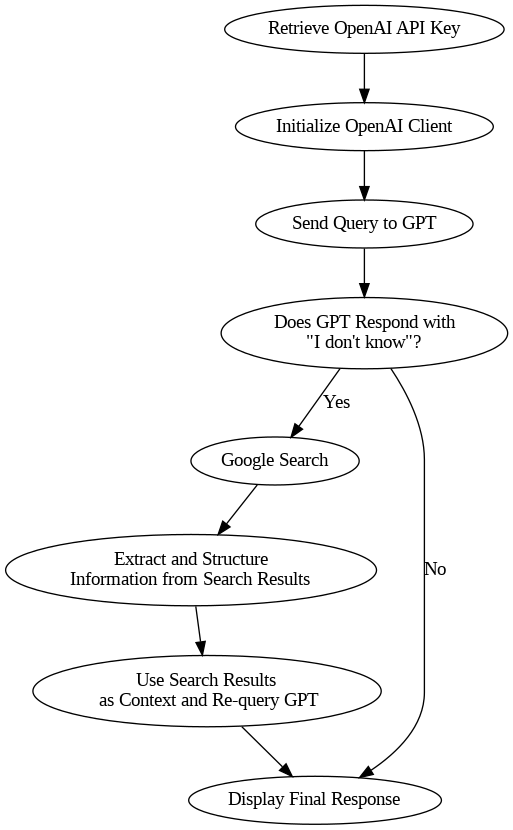

In [5]:
from graphviz import Digraph

# 初始化流程圖
dot = Digraph(comment='Program Logic Flow', format='png')

# 定義節點
dot.node('A', 'Retrieve OpenAI API Key')
dot.node('B', 'Initialize OpenAI Client')
dot.node('C', 'Send Query to GPT')
dot.node('D', 'Does GPT Respond with\n"I don\'t know"?')
dot.node('E', 'Google Search')
dot.node('F', 'Extract and Structure\nInformation from Search Results')
dot.node('G', 'Use Search Results\n as Context and Re-query GPT')
dot.node('H', 'Display Final Response')

# 定義流程
dot.edges(['AB', 'BC', 'CD'])
dot.edge('D', 'E', label='Yes')
dot.edge('D', 'H', label='No')
dot.edge('E', 'F')
dot.edge('F', 'G')
dot.edge('G', 'H')

# 生成圖片
dot.render('1.flowchart', view=False)

# 顯示流程圖
from IPython.display import Image
Image(filename='1.flowchart.png')

## 2.GPT Function Calling

### 2-1 GPT use Search Tool

In [6]:
import googlesearch
from tabulate import tabulate

def search_google(query, num_results=5):
  # 使用googlesearch搜尋
  search_results = list(googlesearch.search(query, advanced=True, num_results=num_results))

  # 確認搜尋結果是否非空
  if not search_results:
      print("未找到相關搜尋結果。")
  else:
      # 過濾搜尋結果
      table_data = []
      for item in search_results:
          table_data.append([item.title, item.description])
          search_content = f"標題: {item.title}\n內容: {item.description}\n\n"

      # 格式化輸出搜尋結果
      print(tabulate(table_data, headers=["標題", "內容"], tablefmt="grid"))
      return search_content

query = "請問2024年金鐘獎的戲劇節目的女配角獎是誰？"
search_google(query, num_results=5)

+------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| 標題                                                             | 內容                                                                                                                                                                 |
+==================================================================+======================================================================================================================================================================+
| 【2024金鐘獎】金鐘59完整得獎名單                                 | Oct 20, 2024  ·  2024金鐘獎完整得獎名單線上看！金鐘59最大贏家是《八尺門的辯護人》，《有生之年》吳慷仁、楊貴媚則抱回2024金鐘獎最佳男主角、最佳女主角。                |
+------------------------------------------------------------------+------------------------------------------------------------------

'標題: 【2024 金鐘獎】金鐘59 完整得獎名單！吳慷仁、楊貴媚封視帝、后\n內容:  Oct 19, 2024  ·  【2024 金鐘獎】金鐘59「最佳女主角」入圍分析，郭雪芙首度入圍，楊貴媚、楊麗音有望再封后！ \n\n'

In [7]:
from google.colab import userdata
from openai import OpenAI
import json

# 取得OpenAI API金鑰
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
# 初始化OpenAI客戶端
client = OpenAI(api_key=OPENAI_API_KEY)


tools = [
    {
        "type": "function",
        "function": {
            "name": "search_google",
            "description": "Performs a search query on Google and returns a list of search results.",
            "strict": True,
            "parameters": {
                "type": "object",
                "required": ["query", "num_results"],
                "properties": {
                    "query": {
                        "type": "string",
                        "description": "The search query string or keywords to search for."
                    },
                    "num_results": {
                        "type": "integer",
                        "description": "The maximum number of search results to return."
                    }
                },
                "additionalProperties": False
            }
        }
    }
]


# 查詢問題
query = "請問2024年金鐘獎的戲劇節目的男配角獎是誰？"
num_results = 10
messages = [{"role": "user", "content": query}]
# 第一次呼叫gpt讓gpt決定是否需要工具
tool_call_completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    tools=tools,
)

# gpt判斷是否需要工具
tool_call_completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    tools=tools,
)
if tool_call_completion.choices[0].message.tool_calls:
    tool_call = tool_call_completion.choices[0].message.tool_calls[0]
    tool_name = tool_call.function.name
    tool_arguments = json.loads(tool_call.function.arguments)

    if tool_name == "search_google":
        # tool_result = search_google(query=query, num_results=5)
        tool_result = search_google(query=tool_arguments['query'], num_results=tool_arguments['num_results'])

        # 將工具結果回傳給gpt
        messages.append(tool_call_completion.choices[0].message)
        messages.append({
            "role": "tool",
            "tool_call_id": tool_call.id,
            "content": tool_result
        })

        response_completion = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=messages,
            tools=tools,
            tool_choice="auto",
        )

        print(response_completion.choices[0].message.content)
else:
    print(tool_call_completion.choices[0].message.content)

+----------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| 標題                                                     | 內容                                                                                                                                                                                |
+==========================================================+=====================================================================================================================================================================================+
| 【2024金鐘獎】金鐘59完整得獎名單                         | Oct 20, 2024  ·  2024金鐘獎「戲劇節目男主角獎」得獎名單 ... 柯叔元，《女兒大人加個賴》。 傅孟柏，《美食無間》。 曾敬驊，《不良執念清除師》。 劉俊謙，《此時此刻》。                 |
+----------------------------------------------------------+----------------------------------------------------

In [8]:
# 查看gpt是否選擇調用工具
if tool_call_completion.choices[0].message.tool_calls:
    print("工具調用:")
    print(tool_call_completion.choices[0].message.tool_calls)
else:
    print("無需調用工具，直接回答:")
    print(tool_call_completion.choices[0].message.content)

工具調用:
[ChatCompletionMessageToolCall(id='call_au34lxURKwAXD2U5ndKAW1kJ', function=Function(arguments='{"query":"2024年金鐘獎 戲劇節目的男配角獎","num_results":5}', name='search_google'), type='function')]


### 2-2 GPT not use Tool

In [9]:
from google.colab import userdata
from openai import OpenAI
import json

# 取得OpenAI API金鑰
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
# 初始化OpenAI客戶端
client = OpenAI(api_key=OPENAI_API_KEY)

# 定義工具
tools = [
    {
        "type": "function",
        "function": {
            "name": "search_google",
            "description": "Performs a search query on Google and returns a list of search results.",
            "strict": True,
            "parameters": {
                "type": "object",
                "required": ["query", "num_results"],
                "properties": {
                    "query": {
                        "type": "string",
                        "description": "The search query string or keywords to search for."
                    },
                    "num_results": {
                        "type": "integer",
                        "description": "The maximum number of search results to return."
                    }
                },
                "additionalProperties": False
            }
        }
    }
]


# 查詢問題
query = "1+1等於多少?"
messages = [{"role": "user", "content": query}]
# 第一次呼叫gpt讓gpt決定是否需要工具
tool_call_completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    tools=tools,
)

# gpt判斷是否需要工具
tool_call_completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    tools=tools,
)
if "tool_calls" in tool_call_completion.choices[0].message:
    tool_call = tool_call_completion.choices[0].message.tool_calls[0]
    tool_name = tool_call.function.name
    tool_arguments = json.loads(tool_call.function.arguments)

    if tool_name == "search_google":
        tool_result = search_google(query=tool_arguments['query'], num_results=tool_arguments['num_results'])

        # 将工具结果返回给gpt
        messages.append(tool_call_completion.choices[0].message)
        messages.append({
            "role": "tool",
            "tool_call_id": tool_call.id,
            "content": tool_result
        })

        response_completion = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=messages,
            tools=tools,
            tool_choice="auto",
        )

        print(response_completion.choices[0].message.content)
else:
    print(tool_call_completion.choices[0].message.content)

1 + 1 等于 2。


In [10]:
# 查看gpt是否選擇調用工具
if tool_call_completion.choices[0].message.tool_calls:
    print("工具調用:")
    print(tool_call_completion.choices[0].message.tool_calls)
else:
    print("無需調用工具直接回答:")
    print(tool_call_completion.choices[0].message.content)

無需調用工具直接回答:
1 + 1 等于 2。


### 2-3 Program Logic Flow

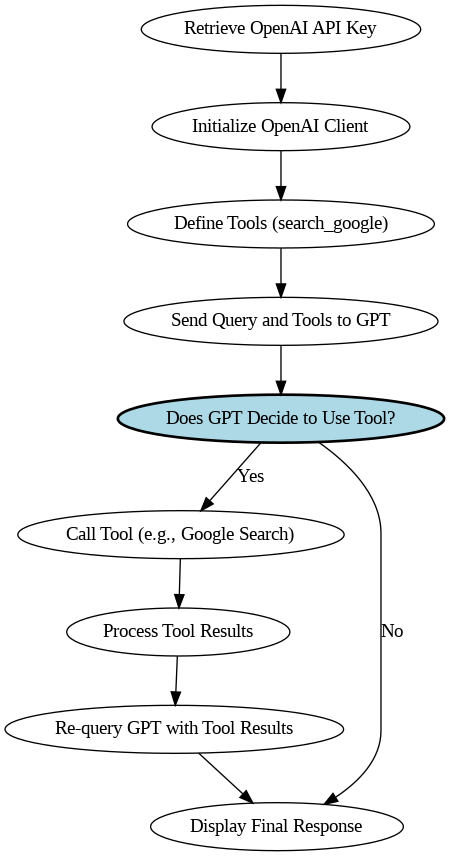

In [11]:
from graphviz import Digraph

# 初始化流程圖
dot = Digraph(comment='Program Logic Flow', format='png')

# 定義節點
dot.node('A', 'Retrieve OpenAI API Key')
dot.node('B', 'Initialize OpenAI Client')
dot.node('C', 'Define Tools (search_google)')
dot.node('D', 'Send Query and Tools to GPT')
dot.node('E', 'Does GPT Decide to Use Tool?', style='filled', fillcolor='lightblue', color='black', penwidth='2')
dot.node('F', 'Call Tool (e.g., Google Search)')
dot.node('G', 'Process Tool Results')
dot.node('H', 'Re-query GPT with Tool Results')
dot.node('I', 'Display Final Response')

# 定義流程
dot.edges(['AB', 'BC', 'CD', 'DE'])
dot.edge('E', 'I', label='No')
dot.edge('E', 'F', label='Yes')
dot.edge('F', 'G')
dot.edge('G', 'H')
dot.edge('H', 'I')

# 生成圖片
dot.render('2.flowchart', view=False)

# 顯示流程圖
from IPython.display import Image
Image(filename='2.flowchart.png')

# Langchain Search

## 3.langchain.agents

[申請 Custom Search JSON API](https://developers.google.com/custom-search/v1/overview?hl=zh-tw)

[申請 Search engine ID](https://programmablesearchengine.google.com/controlpanel/all)

[申請 Langsmith API Key](https://www.langchain.com/langsmith)

In [ ]:
!pip install langchain
!pip install langchain-openai
!pip install langchain-community
!pip install langsmith

### 3-1 Agent use Search Tool

In [13]:
import os
from google.colab import userdata
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain_openai import ChatOpenAI
from langsmith import traceable

# 取得金鑰
os.environ["GOOGLE_CSE_ID"] = userdata.get('GOOGLE_ENGINE_ID')
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

os.environ["LANGCHAIN_TRACING_V2"] = "true"              # 啟用 Tracing V2
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"  # LangSmith API Endpoint
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')  # LangSmith API Key
os.environ["LANGCHAIN_PROJECT"] = "gpt-search-langchain-agent"     # 指定專案名稱

OPENAI_API_KEY = userdata.get("OPENAI_API_KEY")

# 初始化聊天模型和工具
model = ChatOpenAI(openai_api_key=OPENAI_API_KEY, model_name="gpt-4o-mini")
tools = load_tools(["google-search"], llm=model)

# 使用LangSmith追蹤
@traceable(run_type="chain")
# 定義代理
def lc_agent_tools(question):
    # 初始化代理
    agent = initialize_agent(tools, model, agent=AgentType.OPENAI_FUNCTIONS, verbose=True)
    # 執行搜尋
    return agent.invoke({"input": question})

# 執行請求
query = "請問2024年金鐘獎的戲劇節目的新人獎是誰？"
response = lc_agent_tools(query)
print('===== Response =====')
print(response["output"])
print('===== Langsmith Dashbard =====')
print("追蹤數據已記錄到 LangSmith，請前往儀表板查看：https://smith.langchain.com/")

<ipython-input-13-fbf6579a315d>:27: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent = initialize_agent(tools, model, agent=AgentType.OPENAI_FUNCTIONS, verbose=True)




> Entering new AgentExecutor chain...

Invoking: `google_search` with `{'query': '2024年金鐘獎 戲劇節目的新人獎 得主'}`


Oct 20, 2024 ... 2024年金鐘獎頒獎典禮分為廣播、節目、戲劇共3場，分別於10月12日、18日 ... 戲劇節目最具潛力新人獎. 許莉廷／此時此刻; 彭千祐／不良執念清除師 ... Oct 19, 2024 ... ... 鐘這個殿堂，也是因為《白色巨塔》入圍女配角，希望之後我有機會一路的順遂下去。 戲劇節目最具潛力新人獎. 許莉廷《此時此刻》; 彭千祐《不良執念清除 ... Oct 20, 2024 ... 金鐘59頒獎典禮揭曉戲劇類得獎名單！《有生之年》的吳慷仁、楊貴媚則抱回最佳男主角、最佳女主角，《不夠善良的我們》許瑋甯繼去年 ... Oct 19, 2024 ... 另外在戲劇節目部分則由《有生之年》大放異彩，一共奪下6 項大獎，包含新人（謝展榮）、男主角（吳慷仁）、男配角（鄭元暢）、女主角（楊貴媚）、導演、戲劇節目獎！ Oct 20, 2024 ... 2024年金鐘59得獎名單已悉數公布，《八尺門的辯護人》（註1） ... 金鐘59戲劇節目最具潛力新人獎得主《有生之年》謝展榮. ▷歡迎加入Yahoo ... Oct 15, 2024 ... 2024金鐘獎【戲劇節目最具潛力新人獎】入圍名單. 許莉廷／此時此刻. 彭千祐 ... 2024金鐘獎【特別貢獻獎】得主. 梁修身先生. 黃柏雄先生. ↑快速回上 ... 電視金鐘獎星光大道電視金鐘獎頒獎典禮 · 獎盃、獎金 · 1971年3月25日 · 2024年10月18日（節目）. 2024年10月19日（戲劇）. Oct 19, 2024 ... 戲劇節目男配角獎. 鄭元暢《有生之年》. 戲劇節目女配角獎. 楊謹華《不良執念清除師》. 戲劇節目最具潛力新人獎. 謝展榮《有生之年》. 迷你劇集／電視電影 ... 第59届金钟奖（英语：59th Golden Bell Awards / 59th GBA）是2024年台湾传播媒体的颁奖典礼，自2022年开始将节目类与戏剧类分开举办，颁奖典礼于2024年10月18日和10月19日 ... Oct 19, 2024 ... 戲劇節目獎

### 3-2 Agent not use Tool

In [14]:
import os
from google.colab import userdata
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain_openai import ChatOpenAI
from langsmith import traceable

# 取得金鑰
os.environ["GOOGLE_CSE_ID"] = userdata.get('GOOGLE_ENGINE_ID')
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

os.environ["LANGCHAIN_TRACING_V2"] = "true"              # 啟用 Tracing V2
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"  # LangSmith API Endpoint
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')  # LangSmith API Key
os.environ["LANGCHAIN_PROJECT"] = "gpt-search-langchain-agent"     # 指定專案名稱

OPENAI_API_KEY = userdata.get("OPENAI_API_KEY")

# 初始化聊天模型和工具
model = ChatOpenAI(openai_api_key=OPENAI_API_KEY, model_name="gpt-4o-mini")
tools = load_tools(["google-search"], llm=model)

# 使用LangSmith追蹤
@traceable(run_type="chain")
# 定義代理
def lc_agent_tools(question):
    # 初始化代理
    agent = initialize_agent(tools, model, agent=AgentType.OPENAI_FUNCTIONS, verbose=True)
    # 執行搜尋
    return agent.invoke({"input": question})

# 執行請求
query = "1+1等於多少?"
response = lc_agent_tools(query)
print('===== Response =====')
print(response["output"])
print('===== Langsmith Dashbard =====')
print("追蹤數據已記錄到 LangSmith，請前往儀表板查看：https://smith.langchain.com/")



> Entering new AgentExecutor chain...
1 + 1 等于 2。

> Finished chain.
===== Response =====
1 + 1 等于 2。
===== Langsmith Dashbard =====
追蹤數據已記錄到 LangSmith，請前往儀表板查看：https://smith.langchain.com/


### 3-3 Program Logic Flow

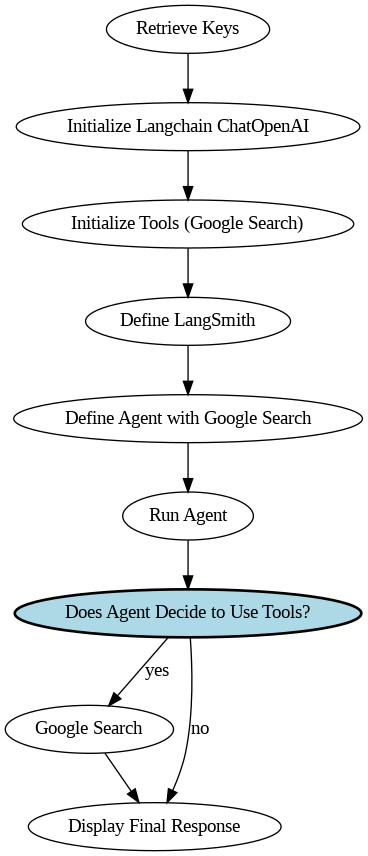

In [15]:
from graphviz import Digraph

# 初始化流程圖
dot = Digraph(comment='Program Logic Flow', format='png')

# 定義節點
dot.node('A', 'Retrieve Keys')
dot.node('B', 'Initialize Langchain ChatOpenAI')
dot.node('C', 'Initialize Tools (Google Search)')
dot.node('D', 'Define LangSmith')
dot.node('E', 'Define Agent with Google Search')
dot.node('F', 'Run Agent')
dot.node('G', 'Does Agent Decide to Use Tools?', style='filled', fillcolor='lightblue', color='black', penwidth='2')
dot.node('H', 'Google Search')
dot.node('I', 'Display Final Response')

# 定義流程
dot.edges([
    ('A', 'B'),('B', 'C'),('C', 'D'),
    ('D', 'E'),('E', 'F'),('F', 'G'),
])
dot.edge('G', 'H', label='yes')
dot.edge('G', 'I', label='no')
dot.edge('H', 'I')


# 生成圖片
dot.render('3.flowchart', view=False)

# 顯示流程圖
from IPython.display import Image
Image(filename='3.flowchart.png')

## 4.langgraph

LangChainDeprecationWarning 推薦使用 LangGraph

- [LangGraph documentation](https://langchain-ai.github.io/langgraph/)
- [Pre-built ReAct agent](https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/)

```
<ipython-input-39-904c0f8f7c93>:26: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. See LangGraph documentation for more details: https://langchain-ai.github.io/langgraph/. Refer here for its pre-built ReAct agent: https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/
  agent = initialize_agent(tools, model, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)
```

以下我是用 Tavily Search 實作
- [申請 Tavily Search API](https://tavily.com/)

In [ ]:
!pip install langchain
!pip install langchain-community
!pip install langchain-openai
!pip install langgraph
!pip install langsmith

### 4-1 Agent use Search Tool

In [17]:
import os
from google.colab import userdata
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import create_react_agent
from tabulate import tabulate

# 取得金鑰
os.environ["GOOGLE_CSE_ID"] = userdata.get('GOOGLE_ENGINE_ID')
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')
os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_PROJECT"] = "gpt-search-langchain-agent"

OPENAI_API_KEY = userdata.get("OPENAI_API_KEY")

# 初始化聊天模型
model = ChatOpenAI(openai_api_key=OPENAI_API_KEY, model="gpt-4o-mini")

# 初始化搜尋工具
tavily_search = TavilySearchResults(tavily_api_key=os.environ["TAVILY_API_KEY"], max_results=5)

# 定義搜尋工具
@tool
def tavily_search_tool(query: str, num_results: int = 5):
    """
    使用 Tavily 搜尋工具查詢問題並整理輸出結構（包含標題與內容）。
    Args:
        query (str): 搜尋的問題或關鍵字。
        num_results (int): 返回的最大結果數量，默認為 5。
    Returns:
        str: 結構化結果（標題、內容）或錯誤提示。
    """
    # 使用Tavily搜尋工具執行查詢
    results = tavily_search.invoke(query, num_results=num_results)
    if results:
        table_data = []
        content = "以下為從搜尋結果中整理的事實：\n\n"
        for item in results:
            title = item.get('title', '無標題')  # 如果沒有標題則顯示預設
            content_snippet = item.get('content', '無摘要')  # 如果沒有摘要則顯示預設

            # 添加到表格數據
            table_data.append([title, content_snippet])
            # 組織輸出內容
            content += f"標題: {title}\n內容: {content_snippet}\n\n"

        # 格式化並打印表格
        print(tabulate(table_data, headers=["標題", "內容"], tablefmt="grid"))
        return content + "請依照上述事實回答以下問題。"
    # 如果沒有找到結果，返回提示訊息
    return "未找到相關搜尋結果。"

# 工具列表
tools = [tavily_search_tool]

# 使用LangGraph的內建的Agent
agent = create_react_agent(model=model, tools=tools)

# 執行請求
query = "請問2024年金鐘獎的戲劇節目獎是哪個戲劇節目？"
response = agent.invoke({"messages": [HumanMessage(content=query)]})
print("===== Response =====")
print(response["messages"][-1].content)
print('===== Langsmith Dashbard =====')
print("追蹤數據已記錄到 LangSmith，請前往儀表板查看：https://smith.langchain.com/")

+--------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| 標題   | 內容                                                                                                                                                                                                                                                                       |
+========+============================================================================================================================================================================================================================================================================+
| 無標題 | 2024金鐘獎戲劇類完整得獎名單揭曉。今年迷你劇集（電視電影）由《八尺門的辯護人》入圍 16 項，最後奪得 7 項大獎，包含「迷你劇集獎」、「戲劇類節目創新獎」、李銘順的「男主角獎」成為大贏家。而許瑋甯擊敗同聚對手林依晨，連莊抱「迷你劇集(電視電影)女主角獎」最佳女主角!         |
+--------

### 4-2 Agent not use Tool

In [18]:
import os
from google.colab import userdata
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import create_react_agent
from tabulate import tabulate

# 取得金鑰
os.environ["GOOGLE_CSE_ID"] = userdata.get('GOOGLE_ENGINE_ID')
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')
os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_PROJECT"] = "gpt-search-langchain-agent"

OPENAI_API_KEY = userdata.get("OPENAI_API_KEY")

# 初始化聊天模型
model = ChatOpenAI(openai_api_key=OPENAI_API_KEY, model="gpt-4o-mini")

# 初始化搜尋工具
tavily_search = TavilySearchResults(tavily_api_key=os.environ["TAVILY_API_KEY"], max_results=5)

# 定義搜尋工具
@tool
def tavily_search_tool(query: str):
    """使用Tavily搜尋工具查詢問題並整理輸出結構"""
    results = tavily_search.invoke(query)
    if results:
        table_data = []
        content = "以下為從搜尋結果中整理的事實：\n\n"
        for item in results:
            table_data.append([item['url'], item['content']])
            content += f"來源: {item['url']}\n摘要: {item['content']}\n\n"
        print(tabulate(table_data, headers=["來源", "摘要"], tablefmt="grid"))
        return content + "請依照上述事實回答以下問題。"
    return "很抱歉，未能找到相關結果。請稍後再試。"

# 工具列表
tools = [tavily_search_tool]

# 使用LangGraph的內建的Agent
agent = create_react_agent(model=model, tools=tools)

# 執行請求
query = "1+1等於多少?"
response = agent.invoke({"messages": [HumanMessage(content=query)]})
print("===== Response =====")
print(response["messages"][-1].content)
print('===== Langsmith Dashbard =====')
print("追蹤數據已記錄到 LangSmith，請前往儀表板查看：https://smith.langchain.com/")

===== Response =====
1+1等於2。
===== Langsmith Dashbard =====
追蹤數據已記錄到 LangSmith，請前往儀表板查看：https://smith.langchain.com/


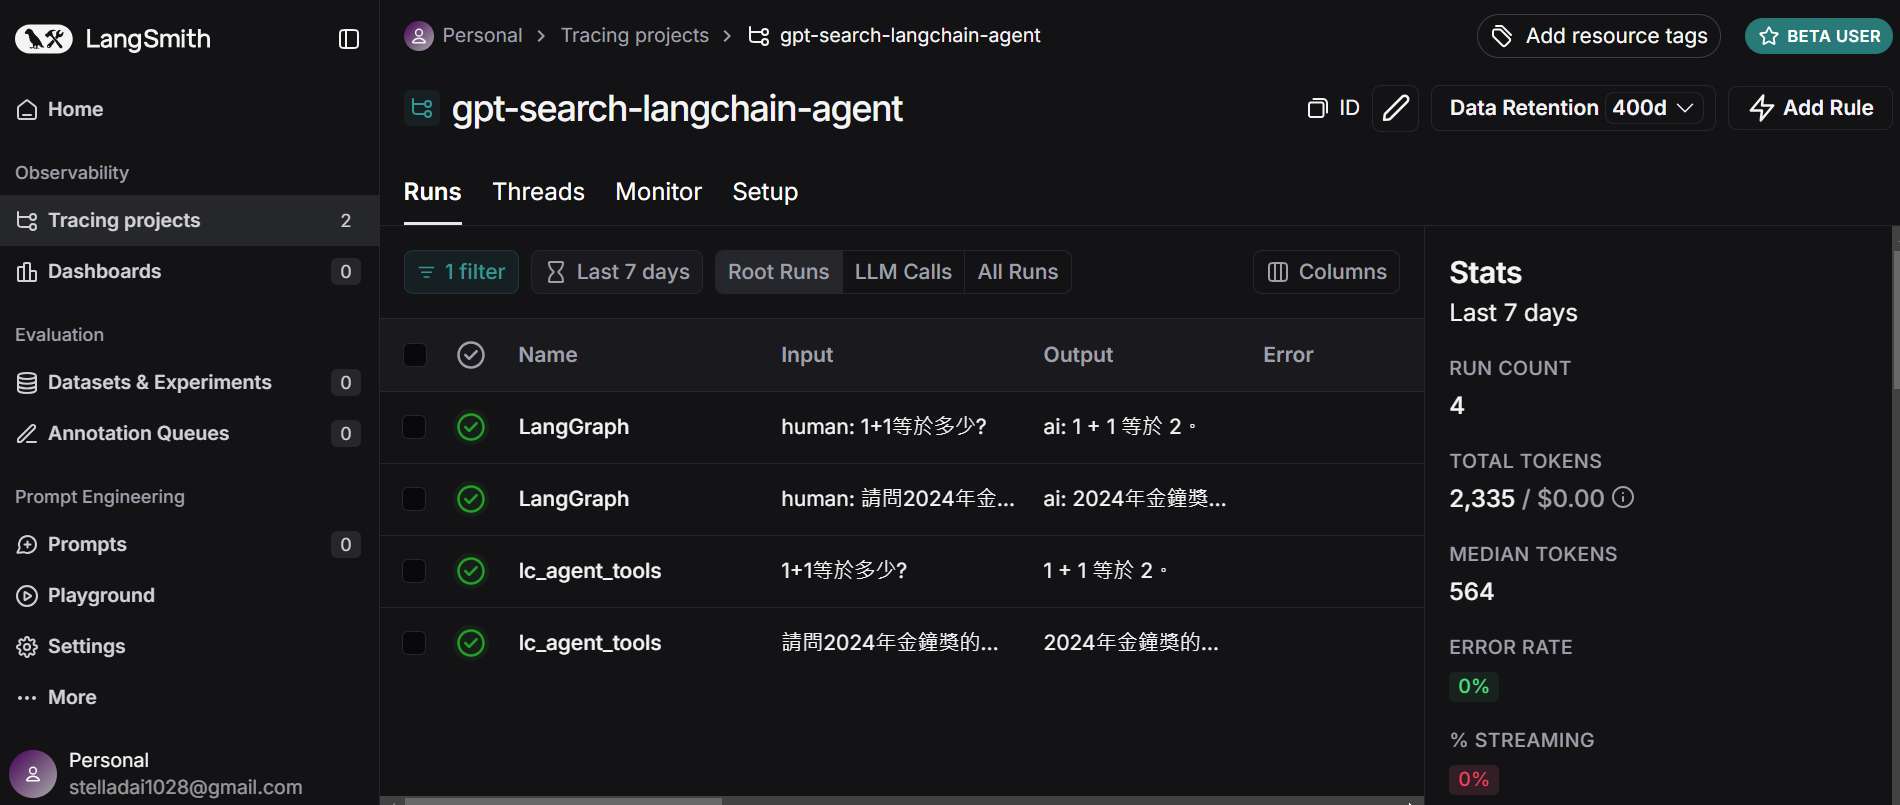

In [19]:
from IPython.display import Image
Image(filename= '/content/drive/MyDrive/LLM/images/langsmith-trace-llm-data.png', width=800)

### 4-3 Program Logic Flow

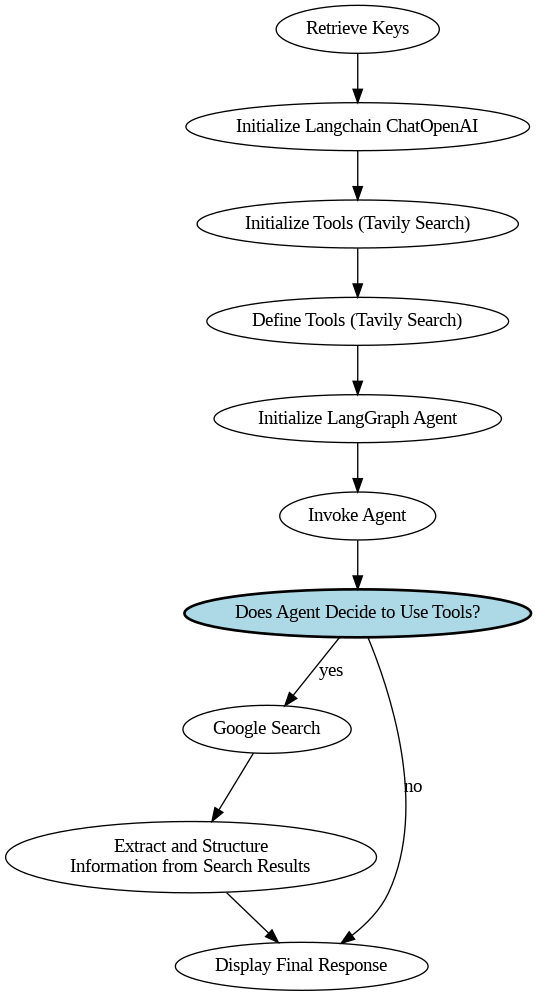

In [20]:
from graphviz import Digraph

# 初始化流程圖
dot = Digraph(comment='Program Logic Flow', format='png')

# 定義節點
dot.node('A', 'Retrieve Keys')
dot.node('B', 'Initialize Langchain ChatOpenAI')
dot.node('C', 'Initialize Tools (Tavily Search)')
dot.node('D', 'Define Tools (Tavily Search)')
dot.node('E', 'Initialize LangGraph Agent')
dot.node('F', 'Invoke Agent')
dot.node('G', 'Does Agent Decide to Use Tools?', style='filled', fillcolor='lightblue', color='black', penwidth='2')
dot.node('H', 'Google Search')
dot.node('I', 'Extract and Structure\nInformation from Search Results')
dot.node('J', 'Display Final Response')

# 定義流程
dot.edges([
    ('A', 'B'),('B', 'C'),('C', 'D'),
    ('D', 'E'),('E', 'F'),('F', 'G'),
    ('H', 'I'), ('I', 'J')
])
dot.edge('G', 'H', label='yes')
dot.edge('G', 'J', label='no')

# 生成圖片
dot.render('3.flowchart', view=False)

# 顯示流程圖
from IPython.display import Image
Image(filename='3.flowchart.png')

# 參考資料

[金鐘獎2024》金鐘59完整得獎名單！](https://www.businessweekly.com.tw/style/blog/3016398)